In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./../dataset_nettoyer_0.csv", 
                   low_memory=False,  
                   encoding='utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35226 entries, 0 to 35225
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   categories_tags     35226 non-null  object 
 1   countries_en        35226 non-null  object 
 2   nutriscore_grade    26732 non-null  object 
 3   energy-kcal_100g    35226 non-null  float64
 4   fat_100g            35226 non-null  float64
 5   saturated-fat_100g  35226 non-null  float64
 6   carbohydrates_100g  35226 non-null  float64
 7   sugars_100g         35226 non-null  float64
 8   fiber_100g          35226 non-null  float64
 9   salt_100g           35226 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.7+ MB


In [11]:
data.head()

,categories_tags,countries_en,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,salt_100g
0,"en:plant-based-foods-and-beverages,en:beverage...",France,b,221.0,0.5,0.1,0.01,0.01,0.0,0.010
1,"en:plant-based-foods-and-beverages,en:beverage...",France,NaN,42.0,0.0,0.0,9.95,9.67,0.0,0.000
2,"en:beverages,en:carbonated-drinks,en:sodas,en:...","France,United States",e,51.0,0.0,0.0,14.00,0.00,0.0,1.000
3,en:beverages,France,e,48.0,0.0,0.0,13.30,12.70,0.0,0.050
4,en:beverages,France,c,4.0,0.1,0.1,0.10,0.10,0.0,0.001


In [5]:
data.nunique()

categories_tags       4158
countries_en           593
nutriscore_grade         5
energy-kcal_100g       918
fat_100g               670
saturated-fat_100g     521
carbohydrates_100g    1543
sugars_100g           1477
fiber_100g             318
salt_100g             1171
dtype: int64

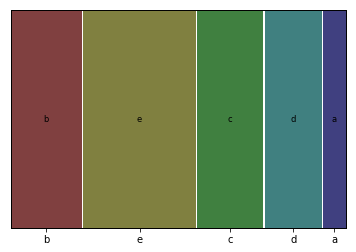

In [22]:
mosaic(data,['nutriscore_grade'])
plt.show()

In [43]:
data.describe()

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,salt_100g
count,35226.000000,35226.000000,35226.000000,35226.000000,35226.000000,35226.000000,35226.000000
mean,73.691343,1.083041,0.562703,14.292636,12.412353,0.350564,0.215655
std,1114.397594,3.969391,2.423382,22.111932,20.203814,2.500347,2.456195
min,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,2.600000,1.000000,0.000000,0.000000
50%,41.000000,0.000000,0.000000,8.300000,7.000000,0.000000,0.010000
75%,55.000000,0.500000,0.100000,11.700000,11.000000,0.000000,0.090000
max,208279.000000,100.000000,60.000000,107.000000,105.000000,89.000000,266.000000


--------------------
energy-kcal_100g
moy:
 73.69134301303403
med:
 41.0
mod:
 0    0.0
dtype: float64
var:
 1241846.7428619796
ect:
 1114.3817760812403
skw:
 185.154455342553
kur:
 34593.28914651016


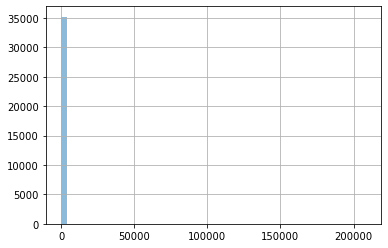

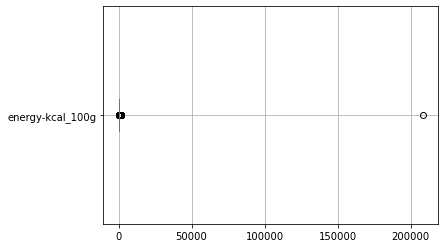

--------------------
fat_100g
moy:
 1.0830409643552252
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 15.755617474764854
ect:
 3.969334638798404
skw:
 8.79333876756705
kur:
 116.49936323442564


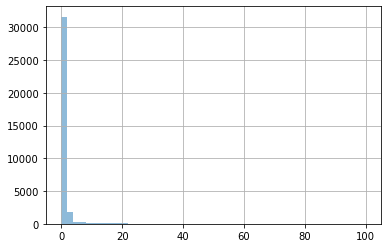

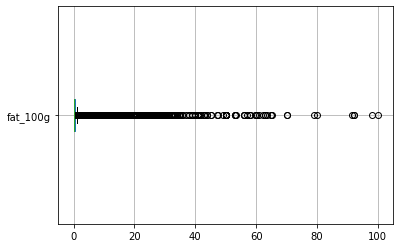

--------------------
saturated-fat_100g
moy:
 0.5627028479390516
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 5.872615099740334
ect:
 2.4233479114110574
skw:
 8.940472872903756
kur:
 118.0400897066761


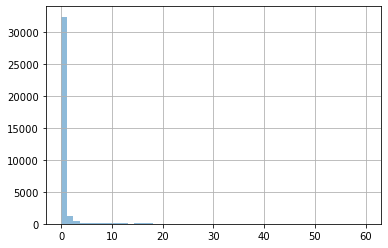

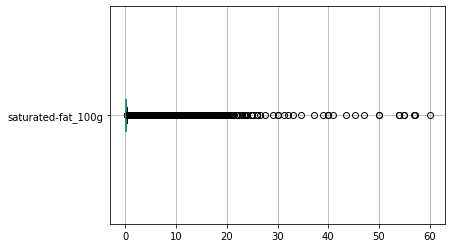

--------------------
carbohydrates_100g
moy:
 14.292636424256346
med:
 8.3
mod:
 0    0.0
dtype: float64
var:
 488.92364093387806
ect:
 22.111617781923556
skw:
 2.367335658123705
kur:
 4.314546628609676


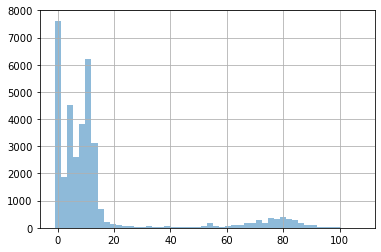

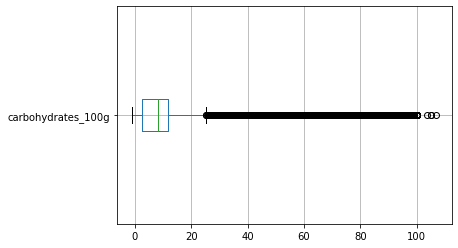

--------------------
sugars_100g
moy:
 12.412353365821614
med:
 7.0
mod:
 0    0.0
dtype: float64
var:
 408.18252223972405
ect:
 20.2035274702148
skw:
 2.586666488008553
kur:
 5.5737587016159615


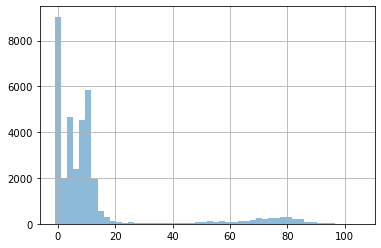

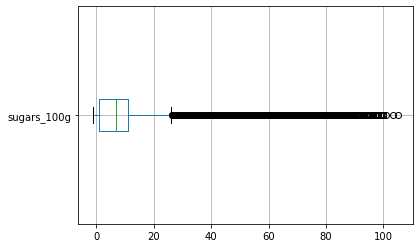

--------------------
fiber_100g
moy:
 0.35056398682791345
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 6.251559847766932
ect:
 2.5003119500908144
skw:
 15.972106598947262
kur:
 342.49504365510853


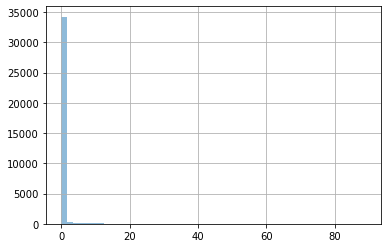

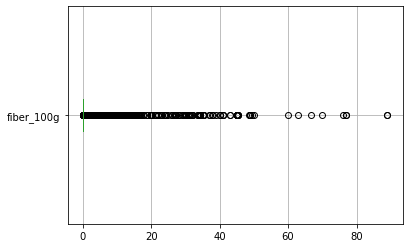

--------------------
salt_100g
moy:
 0.21565481163055406
med:
 0.01
mod:
 0    0.0
dtype: float64
var:
 6.032720721201301
ect:
 2.456159750749389
skw:
 52.63919248682541
kur:
 4432.441981466619


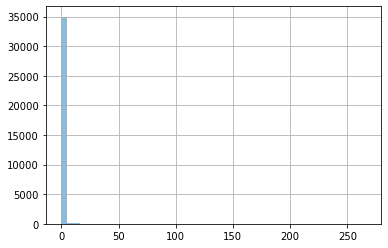

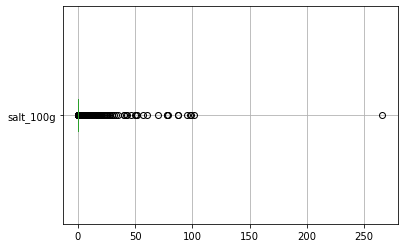

In [56]:
kwargs = dict(alpha=0.5, bins=50)
for column in data.select_dtypes(exclude='object'):
    print("-"*20)
    print(column)
    print("moy:\n",data[column].mean())
    print("med:\n",data[column].median())
    print("mod:\n",data[column].mode())
    print("var:\n",data[column].var(ddof=0))
    print("ect:\n",data[column].std(ddof=0))
    print("skw:\n",data[column].skew())
    print("kur:\n",data[column].kurtosis())
    data[column].hist(**kwargs)
    plt.show()
    data.boxplot(column=column, vert=False)
    plt.show()

# Traitement des outliers et doublons

In [58]:
data.duplicated().sum()

5359

# Test Chi-2

In [ ]:
Hypothése H0: Le nutriscore_grade est indépandant de la catégorie de boisson

## Tableau de contingence

In [5]:
X = 'categories_tags'
Y = 'nutriscore_grade'

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

nutriscore_grade,a,b,c,d,e,Total
categories_tags,,,,,,
en:beverages,NaN,779.0,519.0,587.0,2036.0,3921
"en:beverages,de:milchmischgetränk-schoko",NaN,NaN,NaN,NaN,1.0,1
"en:beverages,en:alkoholfreie-getranke,en:getranke,en:mineralwasser,en:naturliches-mineralwasser,en:naturliches-mineralwasser-ohne-kohlensaure,en:quellwasser,en:wasser",NaN,1.0,NaN,NaN,NaN,1
"en:beverages,en:artificially-sweetened-beverages",NaN,112.0,123.0,140.0,102.0,477
"en:beverages,en:artificially-sweetened-beverages,en:diet-beverages",NaN,2.0,3.0,1.0,NaN,6
...,...,...,...,...,...,...
"en:syrups,fr:sirops-de-noisette",NaN,NaN,NaN,1.0,NaN,1
"en:syrups,fr:sirops-de-poire",NaN,NaN,NaN,2.0,NaN,2
"en:syrups,fr:sirops-gout-barbe-a-papa",NaN,1.0,NaN,7.0,NaN,8


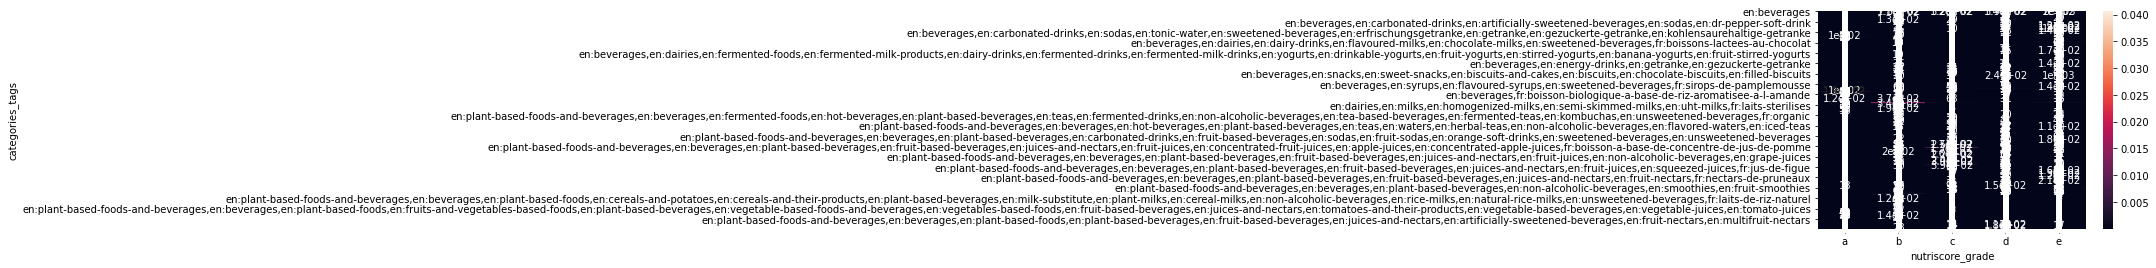

In [6]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [8]:
crosstab = pd.crosstab(data["categories_tags"], data["nutriscore_grade"])

crosstab

nutriscore_grade,a,b,c,d,e
categories_tags,,,,,
en:beverages,0,779,519,587,2036
"en:beverages,de:milchmischgetränk-schoko",0,0,0,0,1
"en:beverages,en:alkoholfreie-getranke,en:getranke,en:mineralwasser,en:naturliches-mineralwasser,en:naturliches-mineralwasser-ohne-kohlensaure,en:quellwasser,en:wasser",0,1,0,0,0
"en:beverages,en:artificially-sweetened-beverages",0,112,123,140,102
"en:beverages,en:artificially-sweetened-beverages,en:diet-beverages",0,2,3,1,0
...,...,...,...,...,...
"en:syrups,fr:sirops-de-glucose",0,0,0,1,0
"en:syrups,fr:sirops-de-noisette",0,0,0,1,0
"en:syrups,fr:sirops-de-poire",0,0,0,2,0


In [20]:
c, p, dof, expected = chi2_contingency(crosstab)
p

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


# Matrice de correlation

<AxesSubplot:>

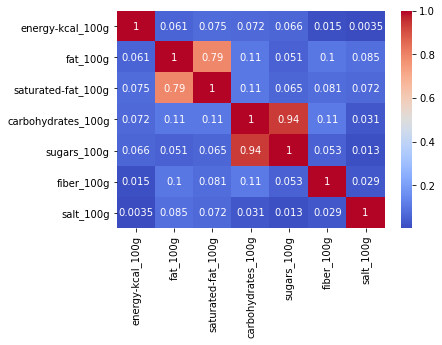

In [3]:
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

# ANOVA

In [ ]:
H0: la moyenne de 1 ingrédient pour chaque nutriscore sont =

# KNN (nutriscore)?